Importing some packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
covid_cases = pd.read_csv('../data/COVID_CountByZipPerDate 03292021.csv')
covid_cases.head()

,Specimen Collection Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [27]:
covid_cases = covid_cases.rename(columns = {'Specimen Collection Date' : 'Date', 'Zip':'Zip','Cases':'Cases'})
covid_cases.head()

,Date,Zip,Cases
0,3/6/2020,37217.0,1
1,3/10/2020,37214.0,1
2,3/11/2020,37013.0,1
3,3/11/2020,37204.0,2
4,3/11/2020,37205.0,1


In [30]:
covid_cases['Zip'] = covid_cases['Zip'].astype('Int64')
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])

In [31]:
print(covid_cases.dtypes)
covid_cases.info

Date     datetime64[ns]
Zip               Int64
Cases             int64
dtype: object


<bound method DataFrame.info of            Date    Zip  Cases
0    2020-03-06  37217      1
1    2020-03-10  37214      1
2    2020-03-11  37013      1
3    2020-03-11  37204      2
4    2020-03-11  37205      1
...         ...    ...    ...
8827 2021-03-27  37210      1
8828 2021-03-27  37211      1
8829 2021-03-27  37212      1
8830 2021-03-27  37214      2
8831 2021-03-27  37221      2

[8832 rows x 3 columns]>

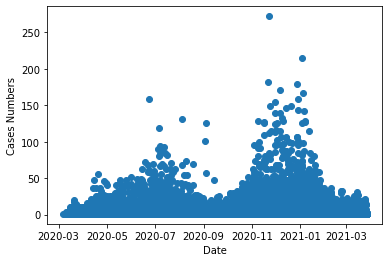

In [32]:
plt.scatter(x = covid_cases['Date'], y = covid_cases['Cases'])
plt.xlabel('Date')
plt.ylabel('Cases Numbers')

plt.show()